# Import Library

In [1]:
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import pandas as pd
import numpy as np
import seaborn as sns # for plotting.
# import warnings
# warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Load Dataset

In [2]:
df1 = pd.read_csv('airbnb_last_review.csv')
df2 = pd.read_csv('airbnb_price.csv')
df3 = pd.read_excel('airbnb_room_type.xlsx')
df1

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019
...,...,...,...
25204,36425863,Rusaa,July 07 2019
25205,36427429,H Ai,July 07 2019
25206,36438336,Ben,July 07 2019
25207,36442252,Blaine,July 07 2019


In [3]:
df2

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"
...,...,...,...
25204,36425863,129 dollars,"Manhattan, Upper East Side"
25205,36427429,45 dollars,"Queens, Flushing"
25206,36438336,235 dollars,"Staten Island, Great Kills"
25207,36442252,100 dollars,"Bronx, Mott Haven"


In [4]:
df3

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt
...,...,...,...
25204,36425863,Lovely Privet Bedroom with Privet Restroom,PRIVATE ROOM
25205,36427429,No.2 with queen size bed,PRIVATE ROOM
25206,36438336,Seas The Moment,Private room
25207,36442252,1B-1B apartment near by Metro,Entire home/apt


# Preprocessing Data

In [5]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index([' listing_id', 'host_name', 'last_review'], dtype='object')
Index(['listing_id', 'price', 'nbhood_full'], dtype='object')
Index(['listing_id', 'description', 'room_type'], dtype='object')


In [6]:
df1 = df1.rename({' listing_id':'listing_id'}, axis=1)

In [7]:
df = pd.merge(df1, df2, on='listing_id')
df = pd.merge(df, df3, on='listing_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
 3   price        25209 non-null  object
 4   nbhood_full  25209 non-null  object
 5   description  25199 non-null  object
 6   room_type    25209 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [8]:
df

,listing_id,host_name,last_review,price,nbhood_full,description,room_type
0,2595,Jennifer,May 21 2019,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt
1,3831,LisaRoxanne,July 05 2019,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Chris,June 22 2019,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Shunichi,June 24 2019,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room
4,5238,Ben,June 09 2019,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt
...,...,...,...,...,...,...,...
25204,36425863,Rusaa,July 07 2019,129 dollars,"Manhattan, Upper East Side",Lovely Privet Bedroom with Privet Restroom,PRIVATE ROOM
25205,36427429,H Ai,July 07 2019,45 dollars,"Queens, Flushing",No.2 with queen size bed,PRIVATE ROOM
25206,36438336,Ben,July 07 2019,235 dollars,"Staten Island, Great Kills",Seas The Moment,Private room
25207,36442252,Blaine,July 07 2019,100 dollars,"Bronx, Mott Haven",1B-1B apartment near by Metro,Entire home/apt


In [9]:
df["last_review"] = pd.to_datetime(df["last_review"])
df

,listing_id,host_name,last_review,price,nbhood_full,description,room_type
0,2595,Jennifer,2019-05-21,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt
1,3831,LisaRoxanne,2019-07-05,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Chris,2019-06-22,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Shunichi,2019-06-24,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room
4,5238,Ben,2019-06-09,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt
...,...,...,...,...,...,...,...
25204,36425863,Rusaa,2019-07-07,129 dollars,"Manhattan, Upper East Side",Lovely Privet Bedroom with Privet Restroom,PRIVATE ROOM
25205,36427429,H Ai,2019-07-07,45 dollars,"Queens, Flushing",No.2 with queen size bed,PRIVATE ROOM
25206,36438336,Ben,2019-07-07,235 dollars,"Staten Island, Great Kills",Seas The Moment,Private room
25207,36442252,Blaine,2019-07-07,100 dollars,"Bronx, Mott Haven",1B-1B apartment near by Metro,Entire home/apt


In [10]:
print('Min date from dataset: %s' % df['last_review'].min().date())
print('Max date from dataset: %s' % df['last_review'].max().date())
selisih = (df['last_review'].max().date() - df['last_review'].min().date()).days
print('Lag Date :', selisih, 'days')

Min date from dataset: 2019-01-01
Max date from dataset: 2019-07-09
Lag Date : 189 days


In [11]:
df['room_type'].unique()

array(['Entire home/apt', 'private room', 'Private room',
       'entire home/apt', 'PRIVATE ROOM', 'shared room',
       'ENTIRE HOME/APT', 'Shared room', 'SHARED ROOM'], dtype=object)

In [12]:
df['room_type'].value_counts()

Entire home/apt    8458
Private room       7241
entire home/apt    2665
private room       2248
ENTIRE HOME/APT    2143
PRIVATE ROOM       1867
Shared room         380
shared room         110
SHARED ROOM          97
Name: room_type, dtype: int64

In [13]:
room_type_random = df['room_type'].value_counts().index
# room_types_l
room_type_dict = {}
for room in room_type_random:
    room_t = str(room)
    if room_t not in room_type_dict.keys():
        room_type_dict[room_t] = room_t.lower()

room_type_dict

{'Entire home/apt': 'entire home/apt',
 'Private room': 'private room',
 'entire home/apt': 'entire home/apt',
 'private room': 'private room',
 'ENTIRE HOME/APT': 'entire home/apt',
 'PRIVATE ROOM': 'private room',
 'Shared room': 'shared room',
 'shared room': 'shared room',
 'SHARED ROOM': 'shared room'}

In [14]:
df['room_type'].replace(room_type_dict, inplace=True)
df.room_type.value_counts()

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64

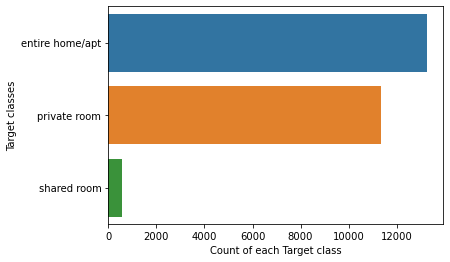

In [15]:
sns.countplot(y=df.room_type)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [16]:
df

,listing_id,host_name,last_review,price,nbhood_full,description,room_type
0,2595,Jennifer,2019-05-21,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,entire home/apt
1,3831,LisaRoxanne,2019-07-05,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,entire home/apt
2,5099,Chris,2019-06-22,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,entire home/apt
3,5178,Shunichi,2019-06-24,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room
4,5238,Ben,2019-06-09,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,entire home/apt
...,...,...,...,...,...,...,...
25204,36425863,Rusaa,2019-07-07,129 dollars,"Manhattan, Upper East Side",Lovely Privet Bedroom with Privet Restroom,private room
25205,36427429,H Ai,2019-07-07,45 dollars,"Queens, Flushing",No.2 with queen size bed,private room
25206,36438336,Ben,2019-07-07,235 dollars,"Staten Island, Great Kills",Seas The Moment,private room
25207,36442252,Blaine,2019-07-07,100 dollars,"Bronx, Mott Haven",1B-1B apartment near by Metro,entire home/apt


In [17]:
le = LabelEncoder()
df['room_type'] = le.fit_transform(df['room_type'])
df

,listing_id,host_name,last_review,price,nbhood_full,description,room_type
0,2595,Jennifer,2019-05-21,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,0
1,3831,LisaRoxanne,2019-07-05,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,0
2,5099,Chris,2019-06-22,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,0
3,5178,Shunichi,2019-06-24,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,1
4,5238,Ben,2019-06-09,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,0
...,...,...,...,...,...,...,...
25204,36425863,Rusaa,2019-07-07,129 dollars,"Manhattan, Upper East Side",Lovely Privet Bedroom with Privet Restroom,1
25205,36427429,H Ai,2019-07-07,45 dollars,"Queens, Flushing",No.2 with queen size bed,1
25206,36438336,Ben,2019-07-07,235 dollars,"Staten Island, Great Kills",Seas The Moment,1
25207,36442252,Blaine,2019-07-07,100 dollars,"Bronx, Mott Haven",1B-1B apartment near by Metro,0


In [18]:
df['price'] = df['price'].apply(lambda x : x.split(' ')[0])
df['price'] = df['price'].astype(float)
# print(df.head())
df

,listing_id,host_name,last_review,price,nbhood_full,description,room_type
0,2595,Jennifer,2019-05-21,225.0,"Manhattan, Midtown",Skylit Midtown Castle,0
1,3831,LisaRoxanne,2019-07-05,89.0,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,0
2,5099,Chris,2019-06-22,200.0,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,0
3,5178,Shunichi,2019-06-24,79.0,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,1
4,5238,Ben,2019-06-09,150.0,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,0
...,...,...,...,...,...,...,...
25204,36425863,Rusaa,2019-07-07,129.0,"Manhattan, Upper East Side",Lovely Privet Bedroom with Privet Restroom,1
25205,36427429,H Ai,2019-07-07,45.0,"Queens, Flushing",No.2 with queen size bed,1
25206,36438336,Ben,2019-07-07,235.0,"Staten Island, Great Kills",Seas The Moment,1
25207,36442252,Blaine,2019-07-07,100.0,"Bronx, Mott Haven",1B-1B apartment near by Metro,0


In [19]:
df['room_type'].unique()

array([0, 1, 2])

In [20]:
df.index = pd.to_datetime(df.last_review)

In [21]:
df_price = df.drop(['listing_id'], axis=1)
df_price['room_type'] = LabelEncoder().fit_transform(df['room_type'])
df_price = df_price.resample('m').mean()
df_price

,price,room_type
last_review,,
2019-01-31,140.556250,0.456250
2019-02-28,145.612766,0.508511
2019-03-31,136.243902,0.480488
2019-04-30,143.211538,0.503434
2019-05-31,139.526373,0.540168
2019-06-30,141.613443,0.501547
2019-07-31,144.487831,0.463492


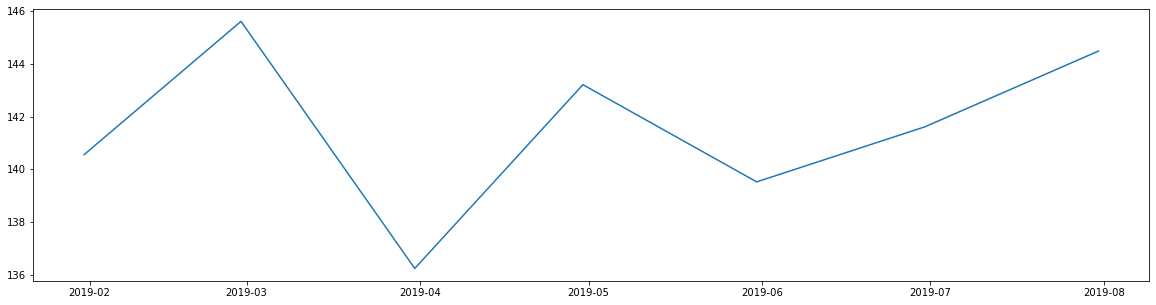

In [22]:
plt.figure(figsize = (20,5))
plt.plot(df_price['price'])
plt.show()

In [23]:
X = df['price']
y = df['room_type']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [25]:
X_train

last_review
2019-06-21     65.0
2019-05-29     40.0
2019-06-30    220.0
2019-06-20    210.0
2019-05-27     65.0
              ...  
2019-06-23     65.0
2019-06-29     75.0
2019-05-16    150.0
2019-03-18     45.0
2019-04-15     49.0
Name: price, Length: 17646, dtype: float64

In [26]:
y_train

last_review
2019-06-21    1
2019-05-29    2
2019-06-30    0
2019-06-20    0
2019-05-27    1
             ..
2019-06-23    1
2019-06-29    1
2019-05-16    0
2019-03-18    1
2019-04-15    1
Name: room_type, Length: 17646, dtype: int32

In [27]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

# Naive Bayes Classifier

In [28]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(X_train, y_train.ravel())

In [29]:
dt = GaussianNB()
dt.fit(X_train,y_train.ravel())

GaussianNB()

In [30]:
%%time
X_test = X_test.values.reshape(-1, 1)
y_pred = dt.predict(X_test)

Wall time: 1 ms


In [31]:
print(classification_report(y_test, y_pred))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

              precision    recall  f1-score   support

           0       0.92      0.48      0.63      4007
           1       0.59      0.95      0.73      3370
           2       0.00      0.00      0.00       186

    accuracy                           0.68      7563
   macro avg       0.50      0.48      0.45      7563
weighted avg       0.75      0.68      0.66      7563

Accuracy : 0.6811
Precision : 0.7518
Recall : 0.6811
F1-score : 0.6604


C:\Users\adhit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhit\anac

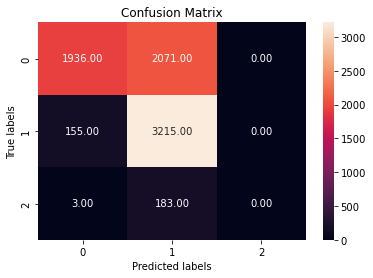

In [32]:
ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.2f', ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [33]:
# Inisiasi random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
# new class distribution 
print(Counter(y_train_ros))

Counter({1: 9259, 2: 9259, 0: 9259})


In [34]:
modelnb1 = GaussianNB()
nbtrain1 = modelnb1.fit(X_train_ros, y_train_ros)

In [35]:
dt1 = GaussianNB()
dt1.fit(X_train_ros,y_train_ros)

GaussianNB()

In [36]:
%%time
y_pred1 = dt1.predict(X_test)

Wall time: 0 ns


In [37]:
print(classification_report(y_test, y_pred1))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_pred1)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_pred1, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_pred1, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_pred1, average='weighted')))

              precision    recall  f1-score   support

           0       0.92      0.46      0.62      4007
           1       0.33      0.26      0.29      3370
           2       0.06      0.92      0.11       186

    accuracy                           0.39      7563
   macro avg       0.44      0.55      0.34      7563
weighted avg       0.64      0.39      0.46      7563

Accuracy : 0.3852
Precision : 0.6351
Recall : 0.3852
F1-score : 0.4592


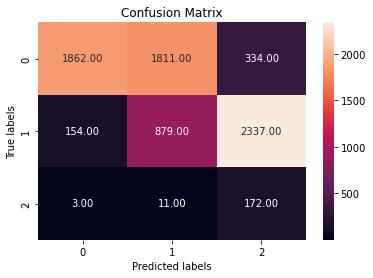

In [38]:
ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred1)

sns.heatmap(cm, annot=True, fmt='.2f', ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [39]:
# Inisiasi random over sampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
# new class distribution 
print(Counter(y_train_rus))

Counter({0: 401, 1: 401, 2: 401})


In [40]:
modelnb2 = GaussianNB()
nbtrain2 = modelnb2.fit(X_train_rus, y_train_rus)

In [41]:
dt2 = GaussianNB()
dt2.fit(X_train_rus,y_train_rus)

GaussianNB()

In [42]:
%%time
y_pred2 = dt2.predict(X_test)

Wall time: 983 µs


In [43]:
print(classification_report(y_test, y_pred2))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_pred2)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_pred2, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_pred2, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_pred2, average='weighted')))

              precision    recall  f1-score   support

           0       0.92      0.52      0.66      4007
           1       0.37      0.30      0.33      3370
           2       0.06      0.91      0.12       186

    accuracy                           0.43      7563
   macro avg       0.45      0.57      0.37      7563
weighted avg       0.65      0.43      0.50      7563

Accuracy : 0.4275
Precision : 0.6548
Recall : 0.4275
F1-score : 0.4999


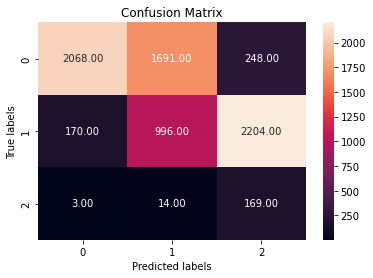

In [44]:
ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred2)

sns.heatmap(cm, annot=True, fmt='.2f', ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [45]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [46]:
np.logspace(0,-9, num=100)

array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674e-05, 1.00000000e-05,
      

In [47]:
gs_NB = GridSearchCV(estimator=dt, 
                     param_grid=params_NB, 
                     cv=10,
                     verbose=10, 
                     scoring='accuracy')
gs_NB.fit(X_train_rus,y_train_rus)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10; 1/100] START var_smoothing=1.0........................................
[CV 1/10; 1/100] END .........var_smoothing=1.0;, score=0.603 total time=   0.0s
[CV 2/10; 1/100] START var_smoothing=1.0........................................
[CV 2/10; 1/100] END .........var_smoothing=1.0;, score=0.562 total time=   0.0s
[CV 3/10; 1/100] START var_smoothing=1.0........................................
[CV 3/10; 1/100] END .........var_smoothing=1.0;, score=0.512 total time=   0.0s
[CV 4/10; 1/100] START var_smoothing=1.0........................................
[CV 4/10; 1/100] END .........var_smoothing=1.0;, score=0.517 total time=   0.0s
[CV 5/10; 1/100] START var_smoothing=1.0........................................
[CV 5/10; 1/100] END .........var_smoothing=1.0;, score=0.542 total time=   0.0s
[CV 6/10; 1/100] START var_smoothing=1.0........................................
[CV 6/10; 1/100] END .........var_smoothing=

[CV 8/10; 11/100] END var_smoothing=0.12328467394420659;, score=0.558 total time=   0.0s
[CV 9/10; 11/100] START var_smoothing=0.12328467394420659.......................
[CV 9/10; 11/100] END var_smoothing=0.12328467394420659;, score=0.483 total time=   0.0s
[CV 10/10; 11/100] START var_smoothing=0.12328467394420659......................
[CV 10/10; 11/100] END var_smoothing=0.12328467394420659;, score=0.592 total time=   0.0s
[CV 1/10; 12/100] START var_smoothing=0.1.......................................
[CV 1/10; 12/100] END ........var_smoothing=0.1;, score=0.645 total time=   0.0s
[CV 2/10; 12/100] START var_smoothing=0.1.......................................
[CV 2/10; 12/100] END ........var_smoothing=0.1;, score=0.579 total time=   0.0s
[CV 3/10; 12/100] START var_smoothing=0.1.......................................
[CV 3/10; 12/100] END ........var_smoothing=0.1;, score=0.545 total time=   0.0s
[CV 4/10; 12/100] START var_smoothing=0.1.......................................
[CV

[CV 8/10; 23/100] END .......var_smoothing=0.01;, score=0.567 total time=   0.0s
[CV 9/10; 23/100] START var_smoothing=0.01......................................
[CV 9/10; 23/100] END .......var_smoothing=0.01;, score=0.517 total time=   0.0s
[CV 10/10; 23/100] START var_smoothing=0.01.....................................
[CV 10/10; 23/100] END ......var_smoothing=0.01;, score=0.617 total time=   0.0s
[CV 1/10; 24/100] START var_smoothing=0.008111308307896872......................
[CV 1/10; 24/100] END var_smoothing=0.008111308307896872;, score=0.653 total time=   0.0s
[CV 2/10; 24/100] START var_smoothing=0.008111308307896872......................
[CV 2/10; 24/100] END var_smoothing=0.008111308307896872;, score=0.587 total time=   0.0s
[CV 3/10; 24/100] START var_smoothing=0.008111308307896872......................
[CV 3/10; 24/100] END var_smoothing=0.008111308307896872;, score=0.554 total time=   0.0s
[CV 4/10; 24/100] START var_smoothing=0.008111308307896872......................
[

[CV 5/10; 36/100] END var_smoothing=0.0006579332246575676;, score=0.567 total time=   0.0s
[CV 6/10; 36/100] START var_smoothing=0.0006579332246575676.....................
[CV 6/10; 36/100] END var_smoothing=0.0006579332246575676;, score=0.533 total time=   0.0s
[CV 7/10; 36/100] START var_smoothing=0.0006579332246575676.....................
[CV 7/10; 36/100] END var_smoothing=0.0006579332246575676;, score=0.550 total time=   0.0s
[CV 8/10; 36/100] START var_smoothing=0.0006579332246575676.....................
[CV 8/10; 36/100] END var_smoothing=0.0006579332246575676;, score=0.558 total time=   0.0s
[CV 9/10; 36/100] START var_smoothing=0.0006579332246575676.....................
[CV 9/10; 36/100] END var_smoothing=0.0006579332246575676;, score=0.517 total time=   0.0s
[CV 10/10; 36/100] START var_smoothing=0.0006579332246575676....................
[CV 10/10; 36/100] END var_smoothing=0.0006579332246575676;, score=0.617 total time=   0.0s
[CV 1/10; 37/100] START var_smoothing=0.00053366

[CV 10/10; 47/100] END var_smoothing=6.579332246575683e-05;, score=0.617 total time=   0.0s
[CV 1/10; 48/100] START var_smoothing=5.3366992312063123e-05....................
[CV 1/10; 48/100] END var_smoothing=5.3366992312063123e-05;, score=0.653 total time=   0.0s
[CV 2/10; 48/100] START var_smoothing=5.3366992312063123e-05....................
[CV 2/10; 48/100] END var_smoothing=5.3366992312063123e-05;, score=0.587 total time=   0.0s
[CV 3/10; 48/100] START var_smoothing=5.3366992312063123e-05....................
[CV 3/10; 48/100] END var_smoothing=5.3366992312063123e-05;, score=0.554 total time=   0.0s
[CV 4/10; 48/100] START var_smoothing=5.3366992312063123e-05....................
[CV 4/10; 48/100] END var_smoothing=5.3366992312063123e-05;, score=0.575 total time=   0.0s
[CV 5/10; 48/100] START var_smoothing=5.3366992312063123e-05....................
[CV 5/10; 48/100] END var_smoothing=5.3366992312063123e-05;, score=0.567 total time=   0.0s
[CV 6/10; 48/100] START var_smoothing=5.336

[CV 3/10; 59/100] END var_smoothing=5.336699231206313e-06;, score=0.554 total time=   0.0s
[CV 4/10; 59/100] START var_smoothing=5.336699231206313e-06.....................
[CV 4/10; 59/100] END var_smoothing=5.336699231206313e-06;, score=0.575 total time=   0.0s
[CV 5/10; 59/100] START var_smoothing=5.336699231206313e-06.....................
[CV 5/10; 59/100] END var_smoothing=5.336699231206313e-06;, score=0.567 total time=   0.0s
[CV 6/10; 59/100] START var_smoothing=5.336699231206313e-06.....................
[CV 6/10; 59/100] END var_smoothing=5.336699231206313e-06;, score=0.533 total time=   0.0s
[CV 7/10; 59/100] START var_smoothing=5.336699231206313e-06.....................
[CV 7/10; 59/100] END var_smoothing=5.336699231206313e-06;, score=0.550 total time=   0.0s
[CV 8/10; 59/100] START var_smoothing=5.336699231206313e-06.....................
[CV 8/10; 59/100] END var_smoothing=5.336699231206313e-06;, score=0.558 total time=   0.0s
[CV 9/10; 59/100] START var_smoothing=5.336699231

[CV 1/10; 71/100] END var_smoothing=4.3287612810830526e-07;, score=0.653 total time=   0.0s
[CV 2/10; 71/100] START var_smoothing=4.3287612810830526e-07....................
[CV 2/10; 71/100] END var_smoothing=4.3287612810830526e-07;, score=0.587 total time=   0.0s
[CV 3/10; 71/100] START var_smoothing=4.3287612810830526e-07....................
[CV 3/10; 71/100] END var_smoothing=4.3287612810830526e-07;, score=0.554 total time=   0.0s
[CV 4/10; 71/100] START var_smoothing=4.3287612810830526e-07....................
[CV 4/10; 71/100] END var_smoothing=4.3287612810830526e-07;, score=0.575 total time=   0.0s
[CV 5/10; 71/100] START var_smoothing=4.3287612810830526e-07....................
[CV 5/10; 71/100] END var_smoothing=4.3287612810830526e-07;, score=0.567 total time=   0.0s
[CV 6/10; 71/100] START var_smoothing=4.3287612810830526e-07....................
[CV 6/10; 71/100] END var_smoothing=4.3287612810830526e-07;, score=0.533 total time=   0.0s
[CV 7/10; 71/100] START var_smoothing=4.328

[CV 9/10; 81/100] END var_smoothing=5.336699231206302e-08;, score=0.517 total time=   0.0s
[CV 10/10; 81/100] START var_smoothing=5.336699231206302e-08....................
[CV 10/10; 81/100] END var_smoothing=5.336699231206302e-08;, score=0.617 total time=   0.0s
[CV 1/10; 82/100] START var_smoothing=4.3287612810830526e-08....................
[CV 1/10; 82/100] END var_smoothing=4.3287612810830526e-08;, score=0.653 total time=   0.0s
[CV 2/10; 82/100] START var_smoothing=4.3287612810830526e-08....................
[CV 2/10; 82/100] END var_smoothing=4.3287612810830526e-08;, score=0.587 total time=   0.0s
[CV 3/10; 82/100] START var_smoothing=4.3287612810830526e-08....................
[CV 3/10; 82/100] END var_smoothing=4.3287612810830526e-08;, score=0.554 total time=   0.0s
[CV 4/10; 82/100] START var_smoothing=4.3287612810830526e-08....................
[CV 4/10; 82/100] END var_smoothing=4.3287612810830526e-08;, score=0.575 total time=   0.0s
[CV 5/10; 82/100] START var_smoothing=4.3287

[CV 1/10; 92/100] END var_smoothing=5.336699231206302e-09;, score=0.653 total time=   0.0s
[CV 2/10; 92/100] START var_smoothing=5.336699231206302e-09.....................
[CV 2/10; 92/100] END var_smoothing=5.336699231206302e-09;, score=0.587 total time=   0.0s
[CV 3/10; 92/100] START var_smoothing=5.336699231206302e-09.....................
[CV 3/10; 92/100] END var_smoothing=5.336699231206302e-09;, score=0.554 total time=   0.0s
[CV 4/10; 92/100] START var_smoothing=5.336699231206302e-09.....................
[CV 4/10; 92/100] END var_smoothing=5.336699231206302e-09;, score=0.575 total time=   0.0s
[CV 5/10; 92/100] START var_smoothing=5.336699231206302e-09.....................
[CV 5/10; 92/100] END var_smoothing=5.336699231206302e-09;, score=0.567 total time=   0.0s
[CV 6/10; 92/100] START var_smoothing=5.336699231206302e-09.....................
[CV 6/10; 92/100] END var_smoothing=5.336699231206302e-09;, score=0.533 total time=   0.0s
[CV 7/10; 92/100] START var_smoothing=5.336699231

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=10)

In [48]:
# melihat parameter terbaik dan skor terbaik
print(gs_NB.best_estimator_)
print(gs_NB.best_score_)

GaussianNB(var_smoothing=0.01)
0.5718388429752066


In [49]:
%%time
y_predht = gs_NB.predict(X_test)

Wall time: 999 µs


In [50]:
# hasil pengujian menggunakan data test setelah menggunakan parameter terbaik
print(classification_report(y_test, y_predht))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_predht)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_predht, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_predht, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_predht, average='weighted')))

              precision    recall  f1-score   support

           0       0.92      0.51      0.66      4007
           1       0.37      0.30      0.33      3370
           2       0.06      0.91      0.12       186

    accuracy                           0.42      7563
   macro avg       0.45      0.57      0.37      7563
weighted avg       0.65      0.42      0.50      7563

Accuracy : 0.4244
Precision : 0.6540
Recall : 0.4244
F1-score : 0.4969


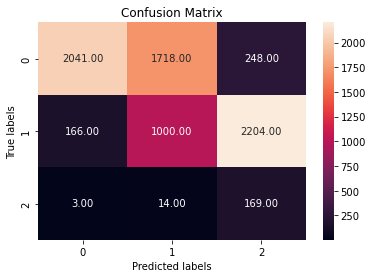

In [51]:
ax= plt.subplot()

cm = confusion_matrix(y_test, y_predht)

sns.heatmap(cm, annot=True, fmt='.2f', ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

# Support Vector Machine Classifier

In [52]:
%%time
clf = svm.SVC()
clf.fit(X_train, y_train.ravel())

Wall time: 5.92 s


SVC()

In [53]:
%%time
y_pred_svm = clf.predict(X_test)

Wall time: 4.13 s


In [54]:
print(classification_report(y_test, y_pred_svm))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_pred_svm)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_pred_svm, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_pred_svm, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_pred_svm, average='weighted')))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4007
           1       0.77      0.79      0.78      3370
           2       0.00      0.00      0.00       186

    accuracy                           0.80      7563
   macro avg       0.53      0.55      0.54      7563
weighted avg       0.78      0.80      0.79      7563

Accuracy : 0.8027
Precision : 0.7830
Recall : 0.8027
F1-score : 0.7927


C:\Users\adhit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhit\anac

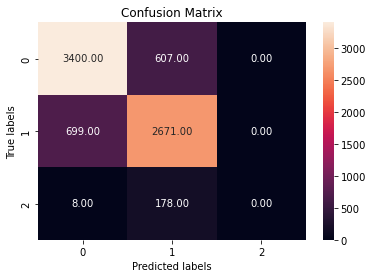

In [55]:
ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm, annot=True, fmt='.2f', ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [56]:
%%time
clf1 = svm.SVC()
clf1.fit(X_train_ros, y_train_ros)
print(Counter(y_train_ros))

Counter({1: 9259, 2: 9259, 0: 9259})
Wall time: 19.7 s


In [57]:
%%time
y_pred_svm1 = clf1.predict(X_test)

Wall time: 9.15 s


In [58]:
print(classification_report(y_test, y_pred_svm1))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_pred_svm1)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_pred_svm1, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_pred_svm1, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_pred_svm1, average='weighted')))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      4007
           1       0.73      0.67      0.70      3370
           2       0.14      0.47      0.21       186

    accuracy                           0.74      7563
   macro avg       0.57      0.65      0.58      7563
weighted avg       0.78      0.74      0.76      7563

Accuracy : 0.7418
Precision : 0.7807
Recall : 0.7418
F1-score : 0.7581


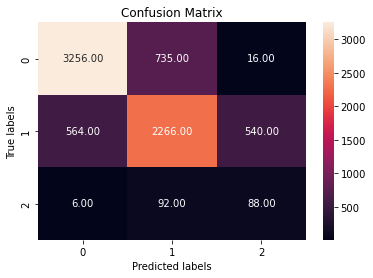

In [59]:
ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred_svm1)

sns.heatmap(cm, annot=True, fmt='.2f', ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [60]:
%%time
clf2 = svm.SVC()
clf2.fit(X_train_rus, y_train_rus)
print(Counter(y_train_rus))

Counter({0: 401, 1: 401, 2: 401})
Wall time: 38 ms


In [61]:
%%time
y_pred_svm2 = clf2.predict(X_test)

Wall time: 440 ms


In [62]:
print(classification_report(y_test, y_pred_svm2))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_pred_svm2)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_pred_svm2, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_pred_svm2, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_pred_svm2, average='weighted')))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      4007
           1       0.71      0.57      0.63      3370
           2       0.10      0.56      0.17       186

    accuracy                           0.70      7563
   macro avg       0.55      0.65      0.55      7563
weighted avg       0.77      0.70      0.73      7563

Accuracy : 0.7004
Precision : 0.7695
Recall : 0.7004
F1-score : 0.7276


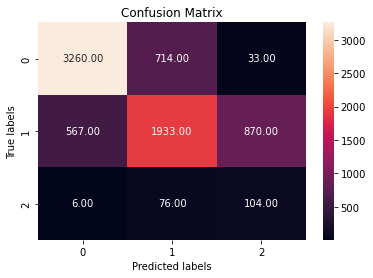

In [63]:
ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred_svm2)

sns.heatmap(cm, annot=True, fmt='.2f', ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [64]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear','rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, verbose = 3)

In [65]:
# grid.fit(X_train_ros, y_train_ros)

# Decision Tree Classifier

In [66]:
DTclass = DecisionTreeClassifier()
DTclass = DTclass.fit(X_train,y_train)

In [67]:
len(y_train)

17646

In [68]:
y_pred_DT = DTclass.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred_DT))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_pred_DT)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_pred_DT, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_pred_DT, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_pred_DT, average='weighted')))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      4007
           1       0.80      0.76      0.78      3370
           2       0.57      0.11      0.19       186

    accuracy                           0.81      7563
   macro avg       0.73      0.58      0.60      7563
weighted avg       0.80      0.81      0.80      7563

Accuracy : 0.8051
Precision : 0.7999
Recall : 0.8051
F1-score : 0.7981


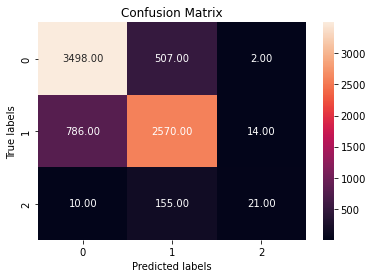

In [70]:
ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred_DT)

sns.heatmap(cm, annot=True, fmt='.2f', ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [71]:
%%time
DTclass1 = DecisionTreeClassifier()
DTclass1.fit(X_train_ros, y_train_ros)
print(Counter(y_train_ros))

Counter({1: 9259, 2: 9259, 0: 9259})
Wall time: 12.1 ms


In [72]:
%%time
y_pred_DT1 = DTclass1.predict(X_test)

Wall time: 1.01 ms


In [73]:
print(classification_report(y_test, y_pred_DT1))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_pred_DT1)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_pred_DT1, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_pred_DT1, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_pred_DT1, average='weighted')))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      4007
           1       0.73      0.60      0.66      3370
           2       0.12      0.62      0.20       186

    accuracy                           0.71      7563
   macro avg       0.57      0.68      0.56      7563
weighted avg       0.78      0.71      0.74      7563

Accuracy : 0.7147
Precision : 0.7786
Recall : 0.7147
F1-score : 0.7395


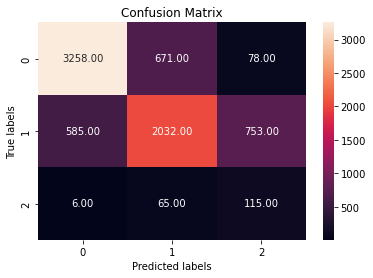

In [74]:
ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred_DT1)

sns.heatmap(cm, annot=True, fmt='.2f', ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [75]:
%%time
DTclass2 = DecisionTreeClassifier()
DTclass2.fit(X_train_rus, y_train_rus)
print(Counter(y_train_rus))

Counter({0: 401, 1: 401, 2: 401})
Wall time: 2 ms


In [76]:
%%time
y_pred_DT2 = DTclass2.predict(X_test)

Wall time: 1 ms


In [77]:
print(classification_report(y_test, y_pred_DT2))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_pred_DT2)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_pred_DT2, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_pred_DT2, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_pred_DT2, average='weighted')))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      4007
           1       0.72      0.65      0.69      3370
           2       0.12      0.50      0.20       186

    accuracy                           0.72      7563
   macro avg       0.56      0.65      0.56      7563
weighted avg       0.77      0.72      0.74      7563

Accuracy : 0.7176
Precision : 0.7677
Recall : 0.7176
F1-score : 0.7386


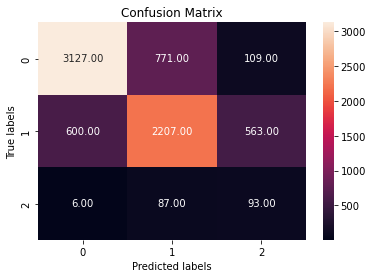

In [78]:
ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred_DT2)

sns.heatmap(cm, annot=True, fmt='.2f', ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 